# Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/EC Infosolutions Challenge/R. Data - 1 tab.xlsx')
df.shape

(200, 15)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA

In [ ]:
df.columns

Index(['StoreCode', 'DTS', 'Shift', 'Day Type', 'Day', 'Month', 'Date', 'Year',
       'Time', 'TicketCode', 'PartySize', 'MenuCateogry', 'MenuItem',
       'ItemPrice', 'ItemQty'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StoreCode     200 non-null    object 
 1   DTS           200 non-null    object 
 2   Shift         200 non-null    object 
 3   Day Type      200 non-null    object 
 4   Day           200 non-null    object 
 5   Month         200 non-null    int64  
 6   Date          200 non-null    int64  
 7   Year          200 non-null    int64  
 8   Time          200 non-null    object 
 9   TicketCode    200 non-null    object 
 10  PartySize     200 non-null    object 
 11  MenuCateogry  200 non-null    object 
 12  MenuItem      200 non-null    object 
 13  ItemPrice     200 non-null    float64
 14  ItemQty       200 non-null    int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 23.6+ KB


In [ ]:
df_categorical = df[['StoreCode', 'DTS', 'Shift', 'Day Type', 'Day', 'Time', 'TicketCode',  'MenuCateogry', 'MenuItem']]
print(df_categorical.shape)
print(df_categorical.head())

(200, 9)
    StoreCode                 DTS  ...        MenuCateogry         MenuItem
0  YALEV6B6K3  01/01/2019 11:30AM  ...             Starter  GOBI MANCHURIAN
1  YALEV6B6K3  01/01/2019 11:30AM  ...             Starter  TASTY FLATBREAD
2  YALEV6B6K3  01/01/2019 11:30AM  ...  VEGETABLE SPECIALS   SARSON DA SAAG
3  YALEV6B6K3  01/01/2019 11:30AM  ...  VEGETABLE SPECIALS  PANEER VINDALOO
4  YALEV6B6K3  01/01/2019 11:30AM  ...              BREADS      GARLIC NAAN

[5 rows x 9 columns]


In [ ]:
for i in np.array(df.columns):
    print('Unique values in ' + str(i) + ' attribute are {}'.format(len(df[i].unique()))  )

Unique values in StoreCode attribute are 2
Unique values in DTS attribute are 22
Unique values in Shift attribute are 2
Unique values in Day Type attribute are 2
Unique values in Day attribute are 2
Unique values in Month attribute are 1
Unique values in Date attribute are 2
Unique values in Year attribute are 1
Unique values in Time attribute are 10
Unique values in TicketCode attribute are 27
Unique values in PartySize attribute are 5
Unique values in MenuCateogry attribute are 8
Unique values in MenuItem attribute are 43
Unique values in ItemPrice attribute are 12
Unique values in ItemQty attribute are 4


<Figure size 432x288 with 0 Axes>

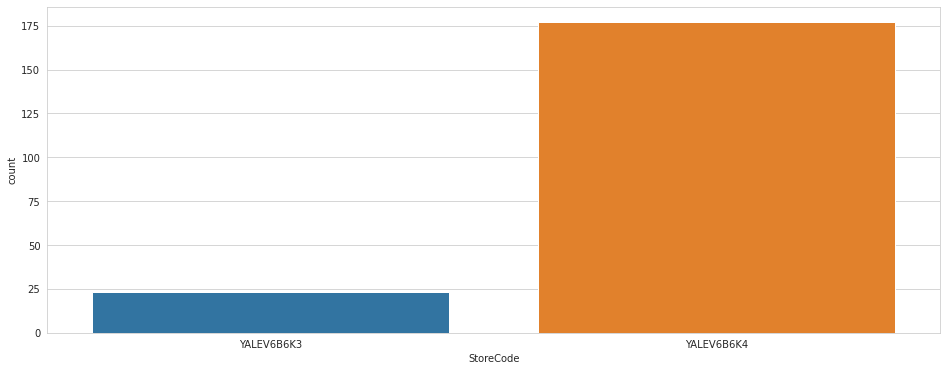

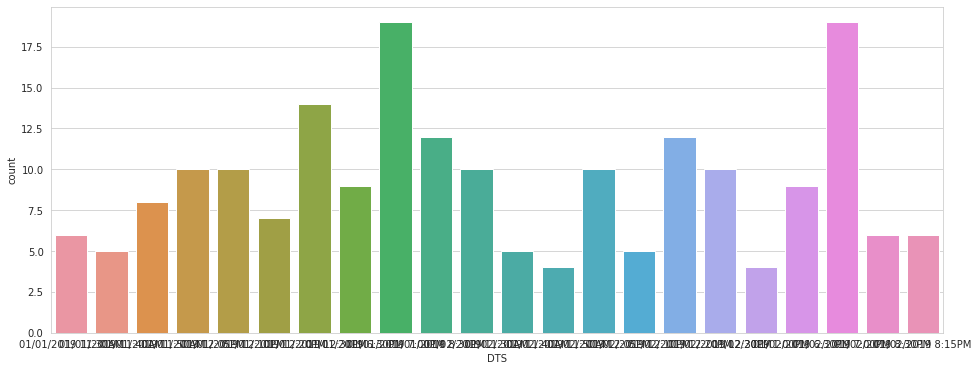

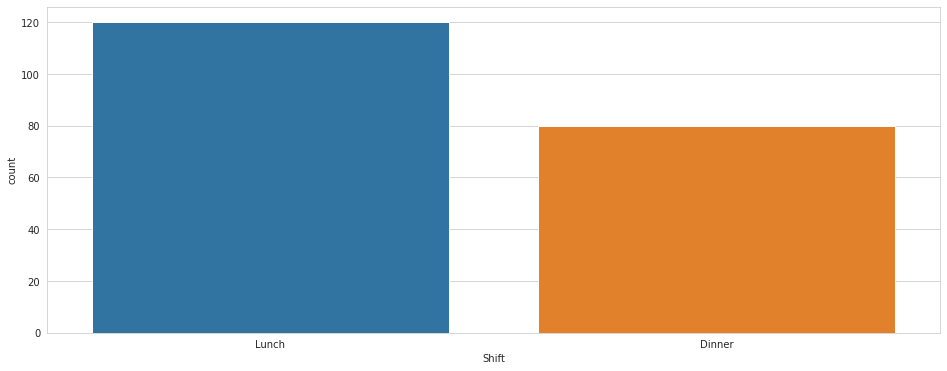

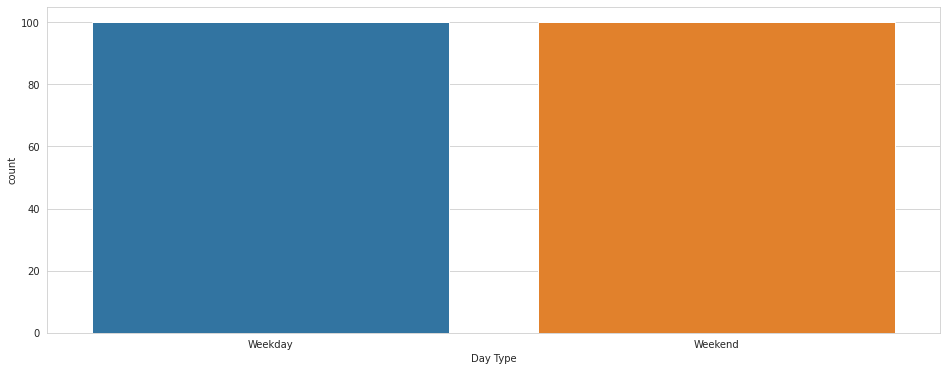

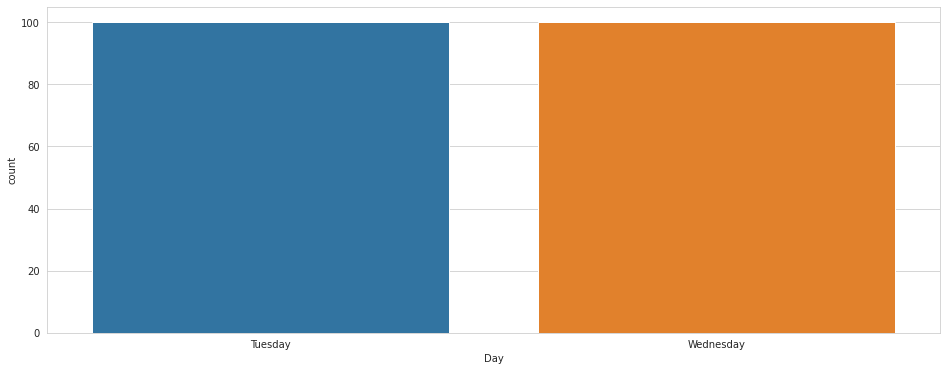

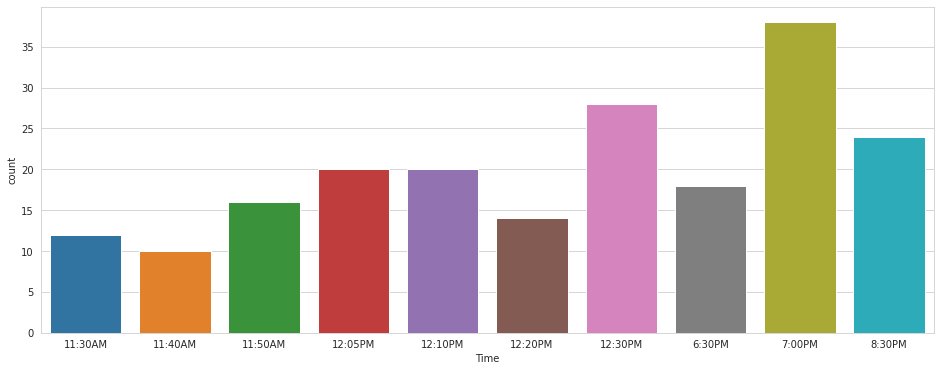

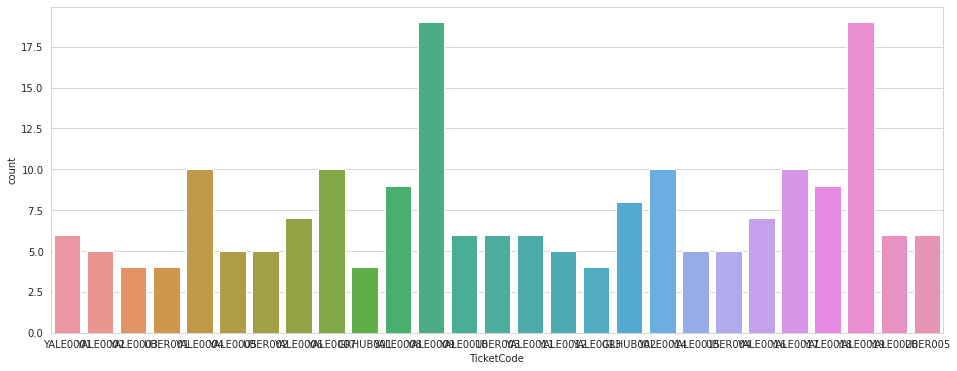

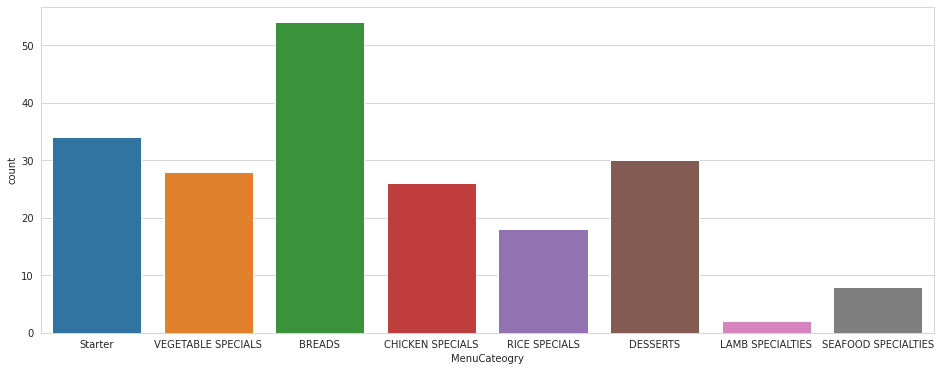

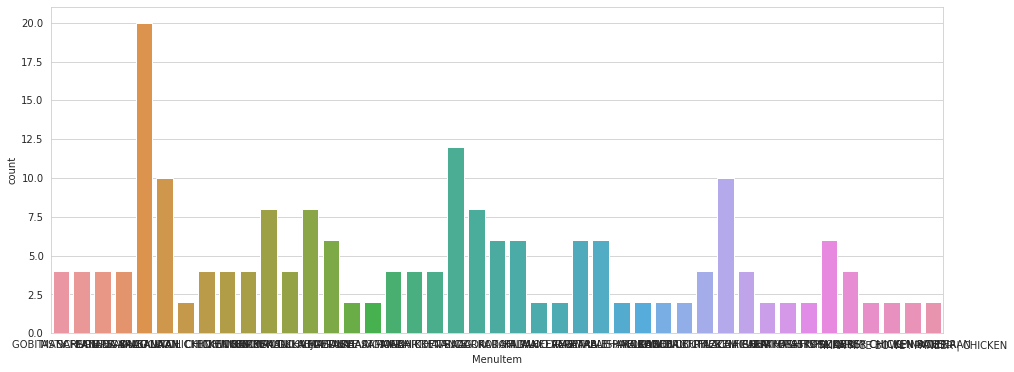

In [ ]:
sns.set_style("whitegrid")
for i, col in enumerate(df_categorical.columns):
    plt.figure(i)
    plt.figure(figsize=(16,6))
    sns.countplot(x=col, data=df_categorical)

In [ ]:
for i, col in enumerate(df_categorical.columns):
    print('\n',i,'.',col)
    print(df_categorical[col].value_counts())
    print('*'*60,'\n')


 0 . StoreCode
YALEV6B6K4    177
YALEV6B6K3     23
Name: StoreCode, dtype: int64
************************************************************ 


 1 . DTS
01/01/2019 7:00PM     19
01/02/2019 7:00PM     19
01/01/2019 12:30PM    14
01/01/2019 8:30PM     12
01/02/2019 12:20PM    12
01/02/2019 11:30AM    10
01/02/2019 12:05PM    10
01/01/2019 12:05PM    10
01/01/2019 12:10PM    10
01/02/2019 12:30PM    10
01/02/2019 6:30PM      9
01/01/2019 6:30PM      9
01/01/2019 11:50AM     8
01/01/2019 12:20PM     7
01/02/2019 8:15PM      6
01/01/2019 11:30AM     6
01/02/2019 8:30PM      6
01/02/2019 12:10PM     5
01/02/2019 11:40AM     5
01/01/2019 11:40AM     5
01/02/2019 1:00PM      4
01/02/2019 11:50AM     4
Name: DTS, dtype: int64
************************************************************ 


 2 . Shift
Lunch     120
Dinner     80
Name: Shift, dtype: int64
************************************************************ 


 3 . Day Type
Weekend    100
Weekday    100
Name: Day Type, dtype: int64
*****

In [ ]:
df_numerical = df[['PartySize', 'ItemPrice', 'ItemQty']]
df_numerical.head()

,PartySize,ItemPrice,ItemQty
0,4,14.0,1
1,4,11.0,1
2,4,15.0,1
3,4,16.0,1
4,4,3.5,2


<Figure size 432x288 with 0 Axes>

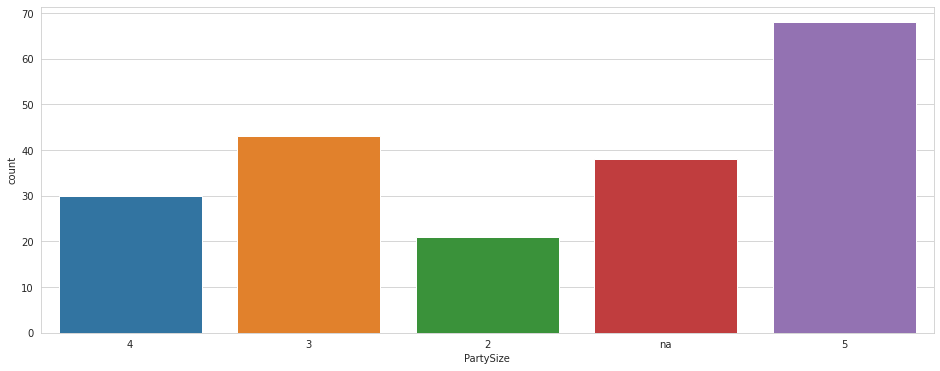

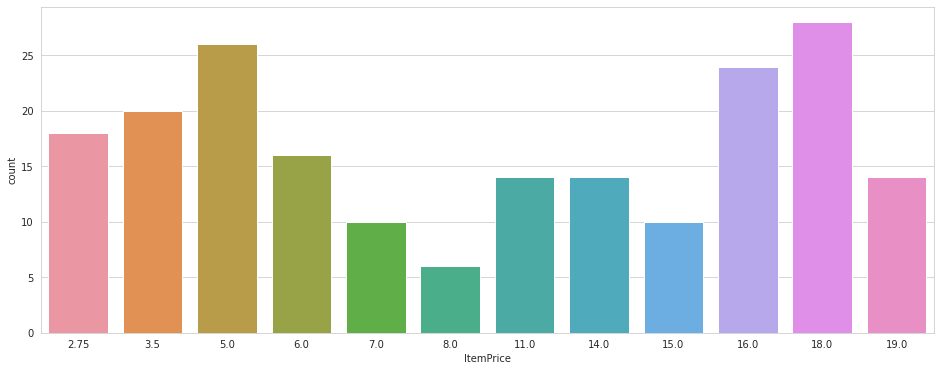

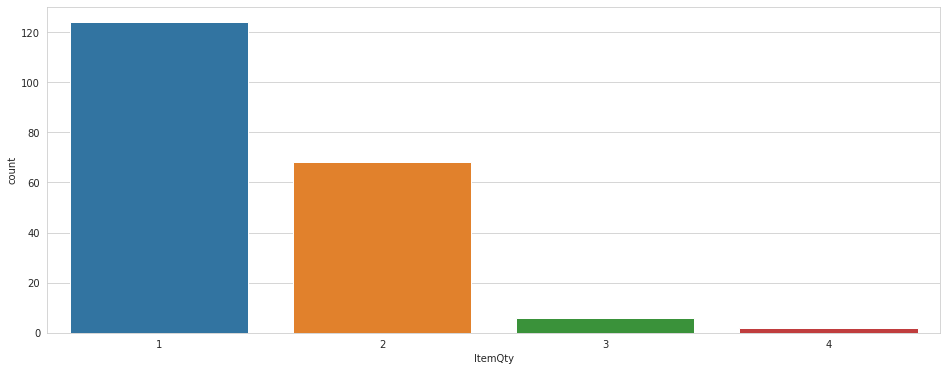

In [ ]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    plt.figure(figsize=(16,6))
    sns.countplot(x=col, data=df_numerical)

## Dealing with NA values 

<Figure size 432x288 with 0 Axes>

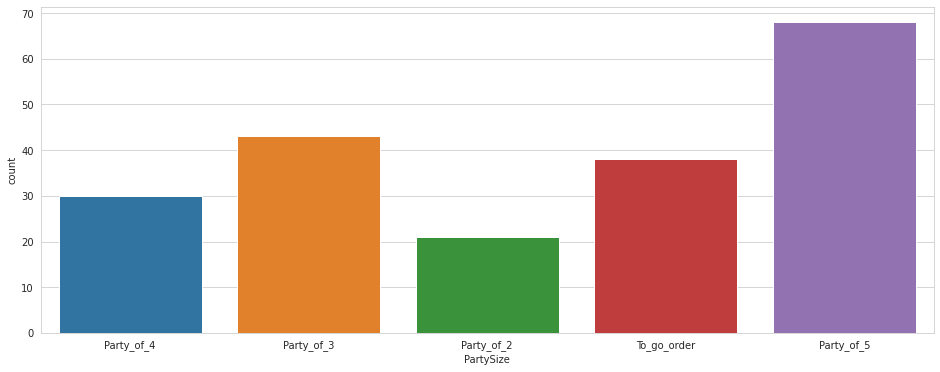

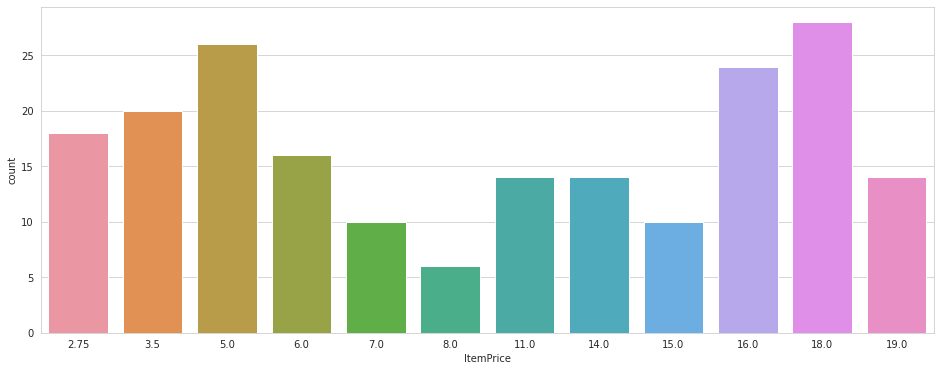

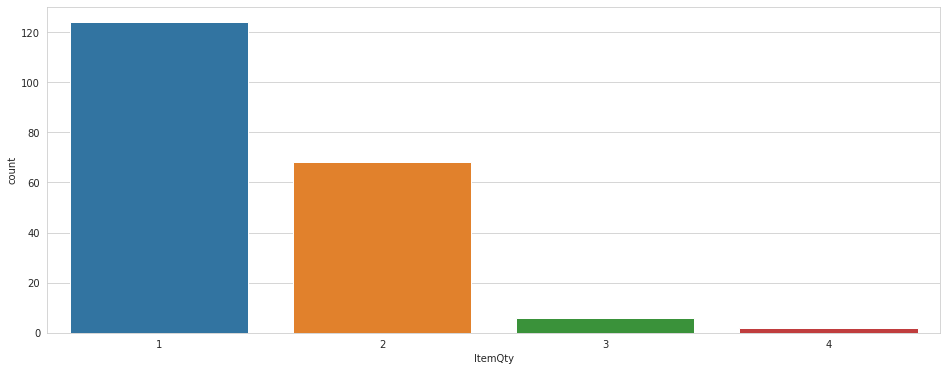

In [ ]:
df['PartySize'] = df['PartySize'].map(({'na':'To_go_order', 2: 'Party_of_2',3:'Party_of_3', 4:'Party_of_4',5:'Party_of_5'}))
df_numerical['PartySize'] = df_numerical['PartySize'].map(({'na':'To_go_order', 2: 'Party_of_2',3:'Party_of_3', 4:'Party_of_4',5:'Party_of_5' }))

for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    plt.figure(figsize=(16,6))
    sns.countplot(x=col, data=df_numerical)